# EDA

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

Tamaño del dataset: (891, 12)

Primeras filas del dataset:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3          

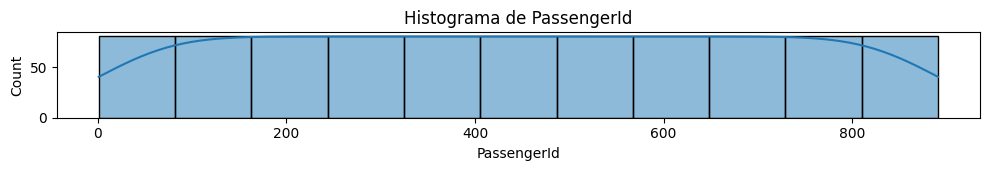

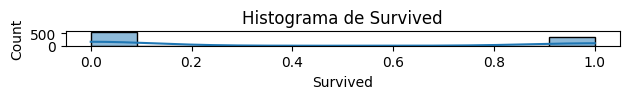

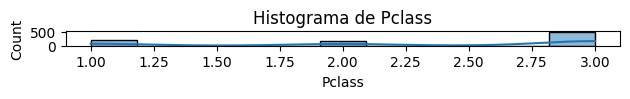

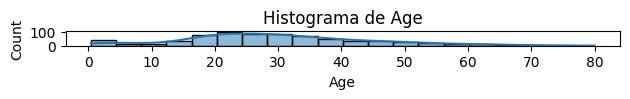

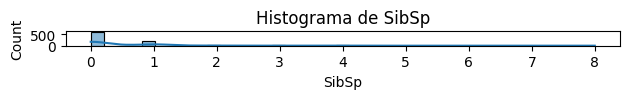

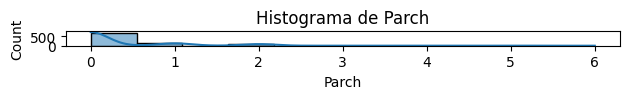

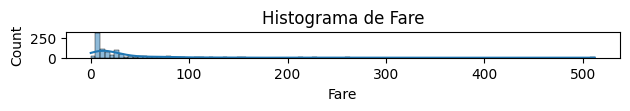

Mapa de calor de correlación entre variables numéricas:



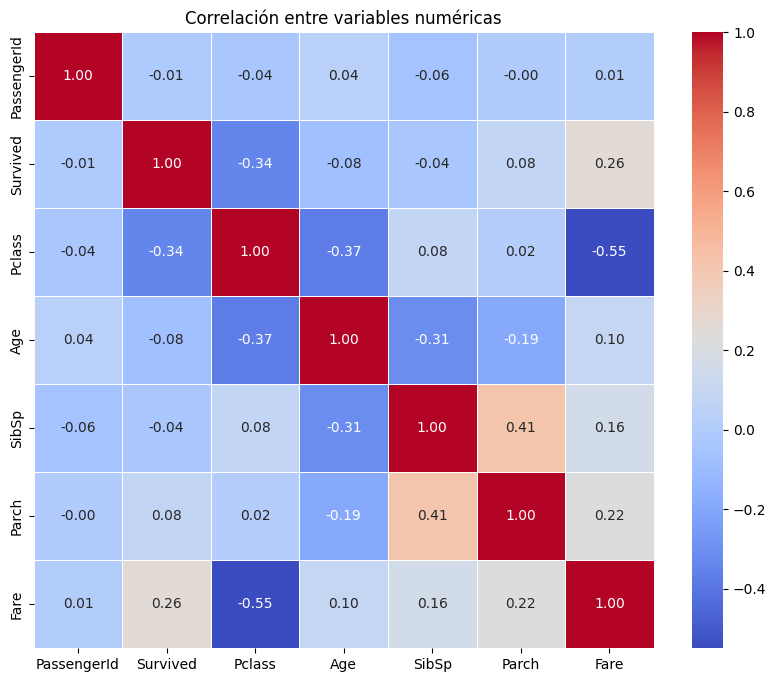

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

# Definir columnas numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Información general:\n")
print(df.info(), "\n")

print(f"Tamaño del dataset: {df.shape}\n")

print("Primeras filas del dataset:\n")
print(df.head(), "\n")

print("Descripción estadística:\n")
print(df.describe(), "\n")

print("Variables categóricas:\n")
for columna in cat_cols:
  print(f"Valores únicos en {columna}:\n")
  print(df[columna].unique(), "\n")

print("Valores nulos:\n")
print(df.isnull().sum(), "\n")

print("Valores duplicados:\n")
print(df.duplicated().sum(), "\n")

print("Outliers:\n")
for columna in num_cols:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers_count = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].shape[0]
  print(f"Cantidad de outliers en {columna}: {outliers_count}\n")

# Graficar histogramas para cada columna numérica
print("Histogramas para variables numéricas:\n")
plt.figure(figsize=(10, 10))
for i, columna in enumerate(num_cols, 1):
  plt.subplot(len(num_cols), 1, i)
  sns.histplot(data=df, x=columna, kde=True)
  plt.title(f"Histograma de {columna}")
  plt.tight_layout()
  plt.show()

# Visualizar la correlación entre variables numéricas con un mapa de calor
print("Mapa de calor de correlación entre variables numéricas:\n")
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlación entre variables numéricas")
plt.show()


Conclusiones:
- Hay valores nulos (utilizaremos un SimpleImputer para tratarlos)
- Hay outliers

  -- Debido a la descripcion de las variables y a la naturaleza del ejericio,  
     no considero necesaria la eliminacion de los outliers en las columnas que los poseen (Age, Parch, Fare, SibSp). Considero que las edades minimas y maximas estan correctas, tambien la cantidad de parientes, y la tarifa de los pasajeros.